# Project 01. Concersion Rate

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.tight_layout()

<Figure size 432x288 with 0 Axes>

# Table of Contents
  1. [Read data](#read_data) 
  2. [Handle Outlier](#handleoutlier) 
  3. [EDA](#EDA)
  4. [Machine Learning-sklearn](#machine_learning_sklearn)


<a id='read_data'></a>
## Read Data

In [133]:
data = pd.read_csv('C:/Users/xiaoj/Desktop/CS/collection of data science-take home challenges/Data/1. conversion_project.csv')
data.head()

,country,age,new_user,source,total_pages_visited,converted
0,UK,25,1,Ads,1,0
1,US,23,1,Seo,5,0
2,US,28,1,Seo,4,0
3,China,39,1,Seo,5,0
4,US,30,1,Seo,6,0


In [134]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 316200 entries, 0 to 316199
Data columns (total 6 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   country              316200 non-null  object
 1   age                  316200 non-null  int64 
 2   new_user             316200 non-null  int64 
 3   source               316200 non-null  object
 4   total_pages_visited  316200 non-null  int64 
 5   converted            316200 non-null  int64 
dtypes: int64(4), object(2)
memory usage: 14.5+ MB


In [135]:
data.describe()

,age,new_user,total_pages_visited,converted
count,316200.000000,316200.000000,316200.000000,316200.000000
mean,30.569858,0.685465,4.872966,0.032258
std,8.271802,0.464331,3.341104,0.176685
min,17.000000,0.000000,1.000000,0.000000
25%,24.000000,0.000000,2.000000,0.000000
50%,30.000000,1.000000,4.000000,0.000000
75%,36.000000,1.000000,7.000000,0.000000
max,123.000000,1.000000,29.000000,1.000000


Summary
1）There are no NaN in the dataset. And there are 2 numerical columns and 4 categorical columns. Since we are aiming at the 'converted', we will focus on the other 3 categorical columns and numerical columns. 
2）One outlier(max of age = 123) can be found from the dataframe's describe.

<a id='handleoutlier'></a>
## Handle Outlier

In [136]:
# Check how many outliers the dataset has
data[data['age']>80]

,country,age,new_user,source,total_pages_visited,converted
90928,Germany,123,0,Seo,15,1
295581,UK,111,0,Ads,10,1


In [137]:
#There are just two outliers, we can remove them as following.
data = data[data['age']<80]

## EDA

(array([0, 1, 2, 3]), <a list of 4 Text major ticklabel objects>)

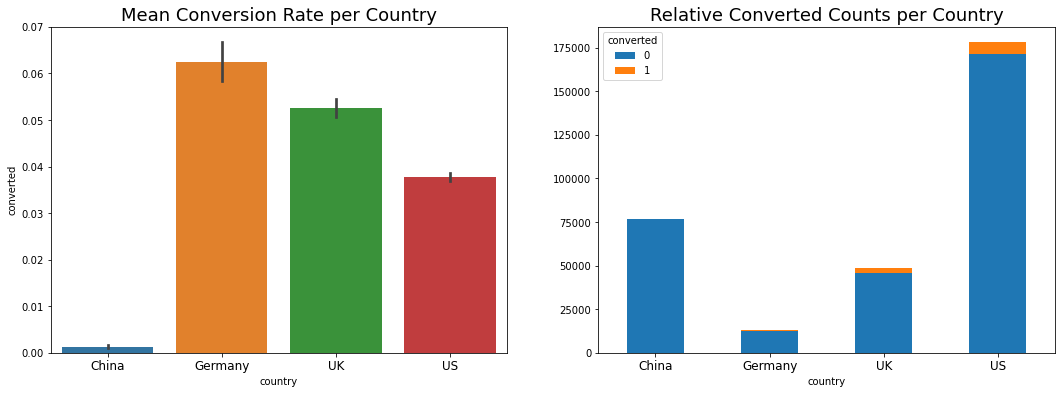

In [11]:
# Visualize the relationship between different countries and conversions
fig,ax = plt.subplots(nrows=1,ncols=2,figsize=(18,6))

sns.barplot(data=data,x='country',y='converted',order=['China','Germany','UK','US'], ax=ax[0])
ax[0].set_title('Mean Conversion Rate per Country',fontsize=18)
ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=0, fontsize=12)

grouped = data.groupby(['country','converted']).count().unstack()
grouped['age'].plot.bar(stacked=True,ax=ax[1])
ax[1].set_title('Relative Converted Counts per Country',fontsize=18)
plt.xticks(rotation=0,fontsize=12)

Country-Conversion Summary:
China has the second largest users, but has the lowest conversion rate. On the contrary, Germany has the smallest users, but the conversion rate is the highest.

(array([0, 1]), <a list of 2 Text major ticklabel objects>)

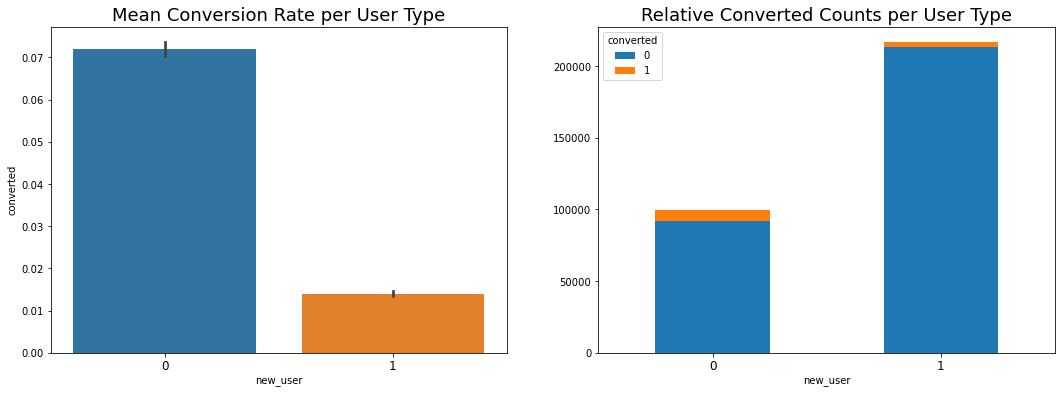

In [12]:
# Visualize the relationship between different new_user and conversions
fig,ax = plt.subplots(nrows=1,ncols=2,figsize=(18,6))

sns.barplot(x='new_user',y='converted',data=data,ax=ax[0])
ax[0].set_title('Mean Conversion Rate per User Type',fontsize=18)
ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=0, fontsize=12)

grouped = data.groupby(['new_user','converted']).count().unstack()
grouped['age'].plot.bar(stacked=True,ax=ax[1])
ax[1].set_title('Relative Converted Counts per User Type',fontsize=18)
plt.xticks(rotation=0,fontsize=12)

User Type-Converstion Summary:
Compared with old-user, new_user showed higher conversion counts.

(array([0, 1, 2]), <a list of 3 Text major ticklabel objects>)

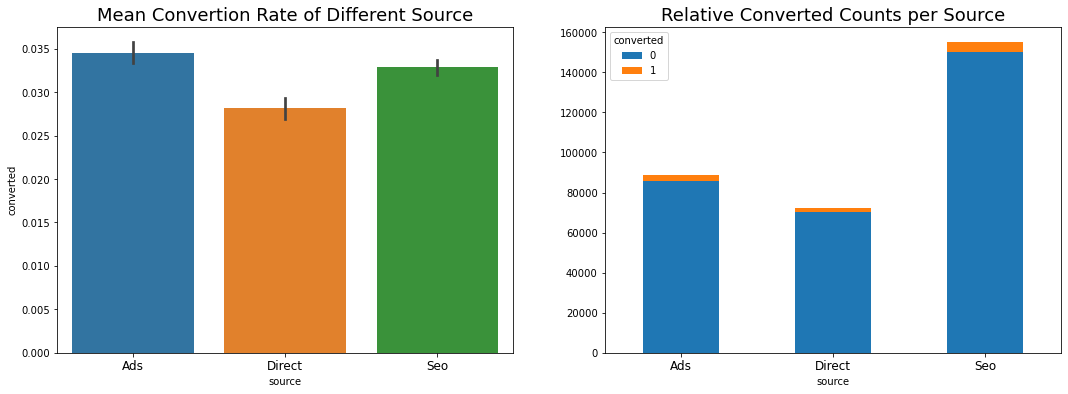

In [27]:
# Visualize the relationship between different source and conversions
fig,ax = plt.subplots(nrows=1,ncols=2,figsize=(18,6))

sns.barplot(x='source',y='converted',data=data, order=['Ads','Direct','Seo'], ax=ax[0])
ax[0].set_title('Mean Convertion Rate of Different Source',fontsize=18)
ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=0, fontsize=12)

grouped = data.groupby(['source','converted']).count().unstack()
grouped['age'].plot.bar(stacked=True,ax=ax[1])
ax[1].set_title('Relative Converted Counts per Source',fontsize=18)
plt.xticks(rotation=0,fontsize=12)

Source-Conversion Summary:
Different source types showed little influence on the conversion rate.

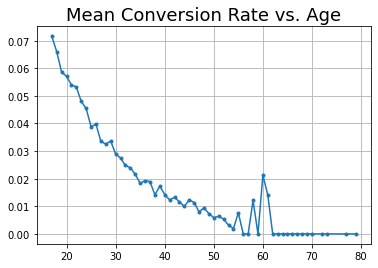

In [165]:
# Check the relationship between Age and converstion rate
grouped = data[['age', 'converted']].groupby('age').mean().reset_index()
plt.plot(grouped['age'], grouped['converted'], '.-')
plt.title('Mean Conversion Rate vs. Age', fontsize=18)
plt.xlabel='age'
plt.ylabel='Mean Convertion Rate'
plt.grid(True)

Age-Conversion Summary:
1) There are basically no conversion from users older than 65;
2) The mean conversion rate decreased with the increase of age.

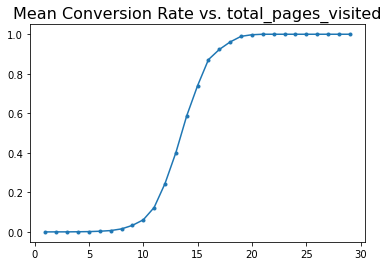

In [166]:
# Check the relationship between page-visited and converstion rate
grouped = data[['total_pages_visited', 'converted']].groupby('total_pages_visited').mean().reset_index()
plt.plot(grouped['total_pages_visited'], grouped['converted'], '.-')
plt.title('Mean Conversion Rate vs. total_pages_visited', fontsize=16)
plt.xlabel='total_pages_visited'
plt.ylabel='Mean convertion rate'
ax[1].grid(True)

Summary:
1) There are basically no conversion from users older than 65; 2) The mean conversion rate decreased with the increase of age; 3) Spending more time on the site implies higher probability of conversion.

<a id='machine_learning_sklearn'></a>
## Machine Learning-sklearn
### 1) Data Preprocessing

In [167]:
#Since original data has Categorical features 'country' and 'source', we need to transform them into numerical values.
x=pd.get_dummies(data.drop('converted',axis=1))
x.head()

,age,new_user,total_pages_visited,country_China,country_Germany,country_UK,country_US,source_Ads,source_Direct,source_Seo
0,25,1,1,0,0,1,0,1,0,0
1,23,1,5,0,0,0,1,0,0,1
2,28,1,4,0,0,0,1,0,0,1
3,39,1,5,1,0,0,0,0,0,1
4,30,1,6,0,0,0,1,0,0,1


In [168]:
y = data.converted
y.mean()

0.03225194340255157

From the y.mean() value, we can conclude that target value is very imbalanced, which reminds us should not use accuracy as the metric to judge a classifer is good or not.

In [169]:
#Split the data into 67% training and 33% test dataset
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.33)

In [170]:
y_train.mean(),y_test.mean()

(0.032187564903800765, 0.03238265002970885)

Both y_train.mean() and y_test.mean() are similar to y.mean(), which means the splitting process doesn't import any bias selection.

### 2) model

Since the outcome is binary, we can choose from the logistic regression, decision tree and random forest. Here I pick the random forest to predict conversion rate. Then I will use feature importance and partial dependence plots to get insights about how the variables impact the convertion.

In [171]:
# Build random forest model and make prediction
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

clf = RandomForestClassifier(oob_score=True)
clf.fit(x_train,y_train)

prediction = clf.predict(x_test)
oob_error=1-clf.oob_score_
test_error=clf.score(x_test,y_test)
print(oob_error)
print(test_error)

0.015770443517172383
0.9841872232764073


In [172]:
#Classification report
print(confusion_matrix(y_test,prediction))
print(classification_report(y_test,prediction))

[[100424    543]
 [  1107   2272]]
              precision    recall  f1-score   support

           0       0.99      0.99      0.99    100967
           1       0.81      0.67      0.73      3379

    accuracy                           0.98    104346
   macro avg       0.90      0.83      0.86    104346
weighted avg       0.98      0.98      0.98    104346



Text(0.5, 1.0, 'Feature Importances')

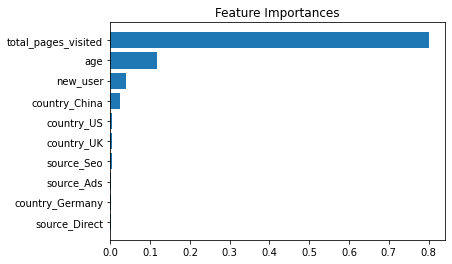

In [173]:
# feature importance

importance = clf.feature_importances_

sorted_idx = clf.feature_importances_.argsort()
plt.figure()

plt.barh(x.columns[sorted_idx],clf.feature_importances_[sorted_idx])
plt.title('Feature Importances')


It can be seen that Total_pages_visited is the most important one. But it makes almost nothing since in order to buy, people visit many pages. So, we rebuild the model without the 'total_pages_visited'.

In [177]:
x2=pd.get_dummies(data.drop(['converted','total_pages_visited'],axis=1))
x_train,x_test,y_train,y_test = train_test_split(x2,y,test_size=0.33)
y_train.mean(),y_test.mean()

(0.03216868379812322, 0.03242098403388726)

In [178]:
clf2 = RandomForestClassifier(oob_score=True)
clf2.fit(x_train,y_train)

prediction = clf2.predict(x_test)
oob_error2=1-clf2.oob_score_
test_error2=clf2.score(x_test,y_test)
print(oob_error2)
print(test_error2)

0.03217812435096201
0.9675790159661127


Text(0.5, 1.0, 'Feature Importances')

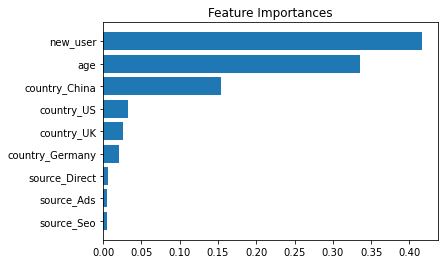

In [179]:
importance = clf2.feature_importances_

sorted_idx2 = clf2.feature_importances_.argsort()
plt.figure()
plt.barh(x2.columns[sorted_idx2],clf2.feature_importances_[sorted_idx2])
plt.title('Feature Importances')

It can be found that new_user has been the most important one after the variable 'total_pages_visited' was discarded.

Let's check the partial dependnece plots for the 5 variables:

(0.0, 0.1)

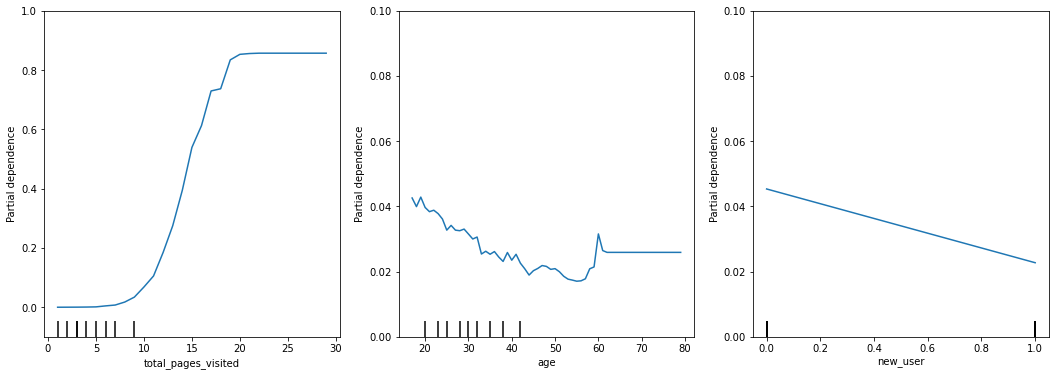

In [193]:
from sklearn.inspection import plot_partial_dependence
x = pd.get_dummies(data.drop(['converted'],axis=1))
clf = RandomForestClassifier(oob_score=True)
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.33)
clf.fit(x_test,y_test)

fig,ax=plt.subplots(1,3,figsize=(18,6))

features=['total_pages_visited','age','new_user']
plot_partial_dependence(clf,x_train,features,ax=ax)
ax[0].set_ylim(-0.1,1)
ax[1].set_ylim(0,0.1)
ax[2].set_ylim(0,0.1)

Summary and Suggestions:

    1.China did really bad in conversion rate, This maybe because taht the site are not well translated, or don't fit the local culture etc. Given the fact that it owes the second largest amount of users, fixing it would be a top priority.
    
    2.Germany showed the best conversion rate. However, the users in Germany are smallest among the four countries. Therefore,to get more Germany involved is definitely great opportunity to improve conversion rate. 
    
    3.Total_pages_visted has the most influence on the convert. It is obvious that someone visting many pages means she has high purchage intent. If someone who has visted many pages but did not convert finnaly, We should send her reminders or targeted merchandise since they are the most possible people to convert.
    
    4. The sencond largest influence facter to convert is new_user.It seems that new_user are more likely to convert compared with the users who have already registered. So, we can increase advertisement to absorb more new users. At the same time, to investigate users with old accounts how they rate the site and service to make improvement.
    
    5. The young people's convertion rate is good. Therefore, to advertise on channels which can reach to more young people is a good opportunity.

Since there are some categorical columns in the dataset, and sklearn has to get_dummies of these categorical data, which induce the split of one feature, such as country has been divided into 4. So we consider to use H2o to solve the machine learning again!


In [3]:
import h2o
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321 . connected.


H2O_cluster_uptime:,10 mins 51 secs
H2O_cluster_timezone:,America/New_York
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.33.0.5375
H2O_cluster_version_age:,1 day
H2O_cluster_name:,H2O_from_python_xiaoj_q4aman
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,87.5 Mb
H2O_cluster_total_cores:,8
H2O_cluster_allowed_cores:,8
H2O_cluster_status:,"locked, healthy"


just test pull request

In [ ]:
a little confusing